In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import tensorflow_datasets as tfds
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.10.12
Tensorflow version: 2.15.0


In [3]:
# # Loading the dataset
# dataset_name = "tf_flowers"
# dataset, info = tfds.load(dataset_name, split="train", with_info=True)
# Loading the dataset
dataset_name = "colorectal_histology"
dataset, info = tfds.load(dataset_name, split="train", with_info=True)

In [4]:
print(info.features["label"].names)

['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import numpy as np
from skimage import color, exposure, filters, segmentation, morphology, transform


In [6]:
# Function to apply preprocessing to an image
def preprocess_image(image):

    # Contrast Stretching
    p2, p98 = np.percentile(image, (2, 98))
    image = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Histogram Equalization
    image = exposure.equalize_hist(image)

    # Canny Edge Detection
    image = filters.sobel(image)

    # Otsu's thesholding for Segmentation
    thresh = filters.threshold_otsu(image)
    image = image > thresh

    # Linear Filter (e.g., Gaussian Blur)
    image = filters.gaussian(image, sigma=1)

    return image


In [7]:
# Creates lists to store processed images and labels
processed_images = [] #Initializes empty lists to store the processed images and their corresponding labels.
labels = []

# Iterates through the dataset, apply preprocessing, and store the results
for example in dataset:
  #Iterates through the dataset, where each example contains an image and a label.
    image = example['image'].numpy()
    label = example['label'].numpy()

    # Applying preprocessing to the image
    processed_image = preprocess_image(image) #Calls the preprocess_image function to process the image.

    # Appending the processed image and label to the lists
    processed_images.append(processed_image)
    labels.append(label)

# Converting lists to numpy arrays
# After processing all the images in the dataset, it converts the lists of processed images and labels into numpy arrays.
processed_images = np.array(processed_images)
labels = np.array(labels)



/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
<ipython-input-6-ea65935d4232>:15: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (150, 150, 3) looks like that of an RGB image.
  thresh = filters.threshold_otsu(image)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


<ipython-input-6-ea65935d4232>:15: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (150, 150, 3) looks like that of an RGB image.
  thresh = filters.threshold_otsu(image)


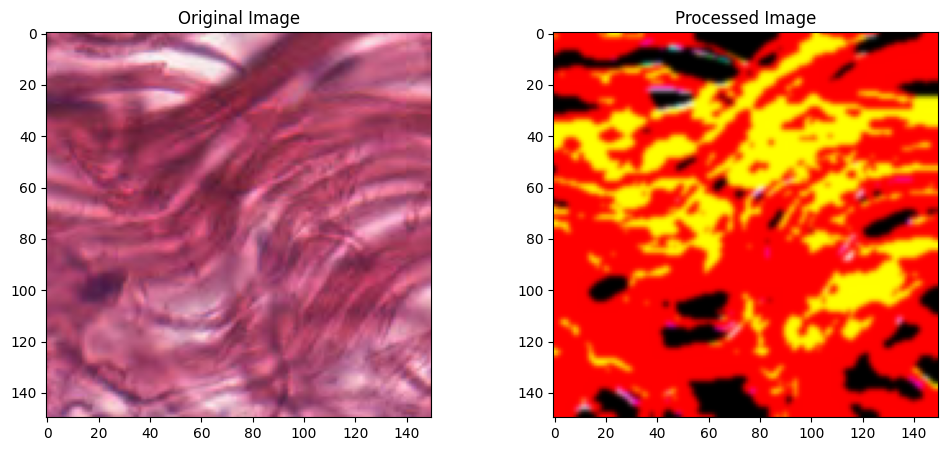

In [8]:
import matplotlib.pyplot as plt

# Loading an example image from the dataset
example = next(iter(dataset))  # Get the first example from the dataset

# Accessing the image and label
example_image = example['image'].numpy()
example_label = example['label'].numpy()

# Applying preprocessing to the example image
processed_image = preprocess_image(example_image)

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the original image on the left subplot
axes[0].imshow(example_image)
axes[0].set_title('Original Image')

# Plotting the processed image on the right subplot
axes[1].imshow(processed_image, cmap='gray')  # Assuming the processed image is grayscale
axes[1].set_title('Processed Image')

plt.show()


In [9]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Flattening the processed_images if they are not flattened already
processed_images = processed_images.reshape(processed_images.shape[0], -1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Creating an SVM classifier (you can choose the kernel type, C value, etc. as per your needs)
clf = svm.SVC(kernel='linear', C=1.0)

# Training the SVM classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f" SVM Accuracy: {accuracy * 100:.2f}%")

# Printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



 SVM Accuracy: 51.90%
Confusion Matrix:
[[82  2 11 24  1  8  0  0]
 [ 0 75 14  4 33  1  0  1]
 [10 45 51 11  6  3  0  0]
 [32  0 11 51 13  9  7  0]
 [ 7 25  7 23 51  7  7  2]
 [29  4 10 29 12 31  1  2]
 [ 1  0  0  3  1  5 86 20]
 [ 0  0  0  6 13  1 20 92]]


In [10]:
from sklearn.neighbors import KNeighborsClassifier


# Creating a KNN classifier (you can adjust the number of neighbors, etc.)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculating the accuracy of the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Printing the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)


KNN Accuracy: 32.00%
Confusion Matrix:
[[101  14   7   5   1   0   0   0]
 [  2  91  13   0  22   0   0   0]
 [ 16  90  17   0   3   0   0   0]
 [ 64   2  19  17  21   0   0   0]
 [ 26  28  19   0  50   0   6   0]
 [ 58   7  26   9  15   1   2   0]
 [  0   0   4   4  59   5  42   2]
 [  0  15   4   3  81   2  26   1]]


In [11]:
#nb
from sklearn.naive_bayes import GaussianNB

# Creating a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Training the Naive Bayes classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculating the accuracy of the Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Printing the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)


Naive Bayes Accuracy: 53.80%
Confusion Matrix:
[[ 71   1  16  29   1  10   0   0]
 [  0  91   9   3  19   5   0   1]
 [ 14  60  38   5   0   9   0   0]
 [ 35   1   1  45   0  24  15   2]
 [ 12  38   2  22  38   7   7   3]
 [ 18   2   5  35   2  52   1   3]
 [  0   0   0   0   0   4  86  26]
 [  0   0   0   0   3   0  12 117]]


In [12]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier (you can adjust the number of trees, etc.)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculating the accuracy of the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Printing the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy: 59.00%
Confusion Matrix:
[[92  2  9  9  0 15  1  0]
 [ 0 64 28  5 28  1  1  1]
 [12 23 78  6  1  6  0  0]
 [16  0  4 81  0 15  5  2]
 [15 18  7 21 50  5  8  5]
 [30  3  9 27  1 41  4  3]
 [ 2  0  0  0  0  4 92 18]
 [ 1  0  0  1  2  2 34 92]]
